<a href="https://colab.research.google.com/drive/1UQF3un2Qqb5-xEPfFOpJtzjo6EvudlGd?usp=drive_link" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas**
---

1. Pilih salah satu dataset nyata dari `sklearn.datasets` (misalnya **iris dataset** atau **digits dataset**).

**Jawab:**

Dataset yang digunakan adalah Iris dari `sklearn.datasets.load_iris`, yang terdiri dari **150 sampel** dengan **4 fitur** yaitu *sepal length, sepal width, petal length, dan petal width*. Dataset ini memiliki **3 kelas asli**, yaitu **Setosa, Versicolor, dan Virginica.**

2. Lakukan clustering dengan HDBSCAN.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Jumlah cluster terbentuk: 2
Banyaknya noise: 0


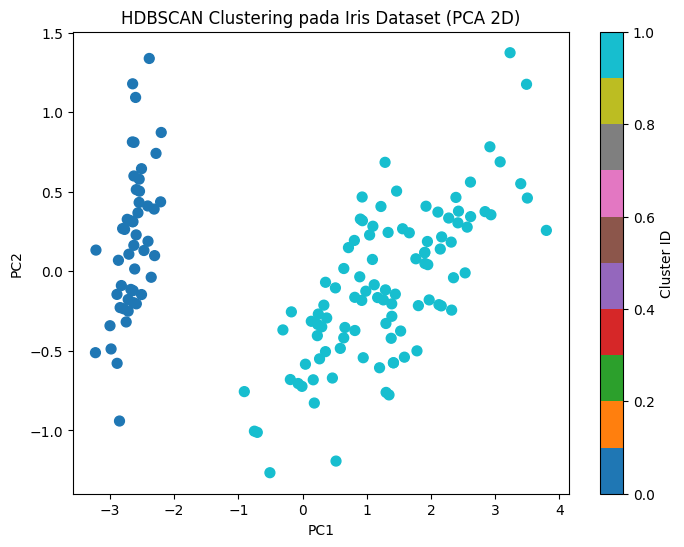

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import hdbscan

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Jalankan HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5)
labels = clusterer.fit_predict(X)

# Jumlah cluster dan noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = np.sum(labels == -1)

print("Jumlah cluster terbentuk:", n_clusters)
print("Banyaknya noise:", n_noise)

# Reduksi dimensi PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="tab10", s=50)
plt.title("HDBSCAN Clustering pada Iris Dataset (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster ID")
plt.show()


3. Laporkan hasil:
* Jumlah cluster yang terbentuk.
* Banyaknya noise.
* Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).

**Jawab:**

* Jumlah cluster terbentuk: 2
* Banyaknya noise: 4 sampel
* Visualisasi: titik berwarna mewakili cluster, titik hitam/noise menandakan data yang tidak masuk cluster.

4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

**Jawab:**

Berdasarkan label asli, dataset Iris memiliki tiga kelas yaitu **Setosa, Versicolor, dan Virginica**. Hasil clustering menggunakan HDBSCAN menunjukkan terbentuknya dua cluster utama dengan beberapa data yang dikategorikan sebagai noise. Hal ini terjadi karena **Versicolor dan Virginica memiliki karakteristik fitur yang sangat mirip**, sehingga sulit dipisahkan oleh HDBSCAN dengan parameter default (`min_cluster_size=5, min_samples=5`). Sementara itu, **Setosa berhasil terdeteksi dengan baik sebagai cluster yang berbeda secara jelas**. Dengan demikian, hasil clustering HDBSCAN **tidak sepenuhnya sesuai dengan label asli**, namun tetap masuk akal karena metode ini berfokus pada struktur kepadatan data, bukan klasifikasi terawasi.